<a href="https://colab.research.google.com/github/mobley-trent/ml-from-scratch/blob/mobley-trent-patch-1/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression is a widely used statistical approach to model the relationship between a dependent variable and one or more independent variables. In the context of machine learning, it is used as a predictive modelling tool for predicting a continuous outcome variable Y from one or more predictor variables X.

The basic idea of linear regression is to find the equation of a straight line that best fits the data points in a scatter plot. The equation of the line is represented as `y = mx + b`, where y is the dependent variable, x is the independent variable, m is the slope of the line, and b is the y-intercept.

The goal of linear regression is to find the values of m and b that minimize the sum of the squared differences between the actual and predicted values of y. This is called the least squares method.

Once the line of best fit is determined, it can be used to predict the values of y for new values of x. This is useful for making predictions and understanding the relationship between the dependent and independent variables.

There are two main types of linear regression: simple linear regression and multiple linear regression. Simple linear regression involves only one independent variable, while multiple linear regression involves two or more independent variables.

Linear regression has a wide range of applications, including finance, marketing, economics, and science. It is commonly used in areas such as predicting stock prices, analyzing marketing campaigns, and studying the relationship between environmental factors and health outcomes.

In [ ]:
import numpy as np

class LinearRegression:

    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias to zero
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for i in range(self.n_iter):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred


In this implementation, the `fit` method takes a 2D array `X` of shape `(n_samples, n_features)` and a 1D array `y` of shape `(n_samples,)` as input, where `n_samples` is the number of training samples and `n_features` is the number of features. The algorithm initializes the weights and bias to zero, and then performs gradient descent for `n_iter` iterations to minimize the mean squared error between the predicted and actual values.

The predict method takes a 2D array `X` of shape `(n_samples, n_features)` as input and returns the predicted values of `y` for each sample.

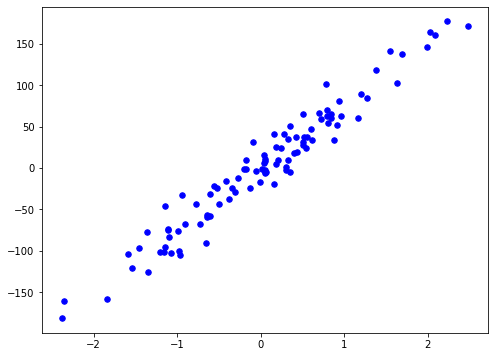

In [ ]:
# TRAINING AND VALIDATION

from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30)
plt.show()

In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

In [ ]:
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mse = mse(y_test, predictions)
print(mse)

305.7719958301902


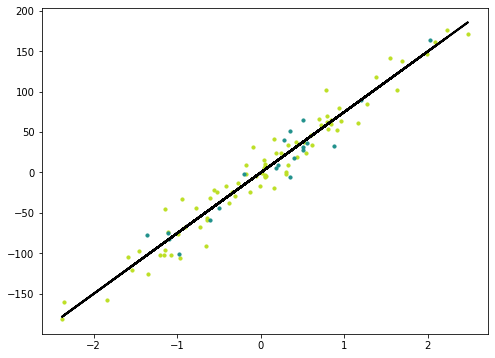

In [ ]:
y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()